In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# import pandas as pd

# base_file_path = 'T_T100D_SEGMENT_ALL_CARRIER {}.csv'

# # Initialize an empty list to store the dataframes' heads
# merged_df = pd.DataFrame()

# # Loop through numbers 1, 2, and 3 to read each file
# for i in range(1, 11):
#     file_path = base_file_path.format(i)
#     df = pd.read_csv(file_path)
#     merged_df = pd.concat([merged_df, df])
#     merged_df.reset_index(drop=True, inplace=True)

In [14]:
# merged_df["YEAR"].unique()
# merged_df.shape

## Loading Data

In [15]:
# merged_df.to_csv('merged.csv')
T_100 = pd.read_csv('merged.csv')

In [16]:
T_100 = T_100.replace(0, np.nan)
T_100 = T_100.dropna()

In [17]:
# # T_100.dropna(inplace=True)
# columns_to_check = ["DEPARTURES_SCHEDULED", "DISTANCE", "AIR_TIME"]

# # Replace zeros with NaN in the specified columns
# T_100[columns_to_check] = T_100[columns_to_check].replace(0, pd.NA)

# # Drop rows with NaN in any of the specified columns
# final_df = T_100.dropna(subset=columns_to_check)

In [18]:
base_file_path = 'P52_original/T_F41SCHEDULE_P52 {}.csv'

# Initialize an empty list to store the dataframes' heads
P_52 = pd.DataFrame()

# Loop through numbers 1, 2, and 3 to read each file
for i in range(1, 11):
    file_path = base_file_path.format(i)
    df = pd.read_csv(file_path)
    P_52 = pd.concat([P_52, df])
    P_52.reset_index(drop=True, inplace=True)

In [53]:
P_52 = P_52.replace(0, np.nan)
P_52.dropna(inplace=True)

In [50]:
P_52[['AIRLINE_ID', 'YEAR', 'QUARTER', 'AIRCRAFT_TYPE']].drop_duplicates()

,AIRLINE_ID,YEAR,QUARTER,AIRCRAFT_TYPE
412,20417,2011,1,628
413,20417,2011,1,629
414,20190,2011,4,627
766,20366,2011,3,631
767,20366,2011,4,631
...,...,...,...,...
19144,20368,2019,2,694
19146,19805,2019,2,614
19182,19790,2019,3,655
19214,19790,2019,1,655


In [56]:
P_52 = P_52.groupby(['AIRLINE_ID', 'YEAR', 'QUARTER', 'AIRCRAFT_TYPE']).sum().reset_index()

P_52.head(), P_52.shape

(   AIRLINE_ID  YEAR  QUARTER  AIRCRAFT_TYPE  FUEL_FLY_OPS  TOTAL_AIR_HOURS  \
 0       19393  2010        1            612      510427.0           274.11   
 1       19393  2010        1            616       35412.0            17.58   
 2       19393  2010        1            619      236090.0           114.87   
 3       19393  2010        2            612      578641.0           301.94   
 4       19393  2010        2            616       39337.0            18.77   
 
    AIR_FUELS_ISSUED  
 0         214903.94  
 1          14909.26  
 2          99400.27  
 3         241463.97  
 4          16415.25  ,
 (5693, 7))

In [57]:
# T_100.dropna(inplace=True)
T_100_aggregated_df = T_100.groupby(['AIRLINE_ID', 'YEAR', 'QUARTER', 'AIRCRAFT_TYPE']).sum().reset_index()

T_100_aggregated_df.head(), T_100_aggregated_df.shape

(   AIRLINE_ID  YEAR  QUARTER  AIRCRAFT_TYPE    Unnamed: 0  \
 0     19393.0  2010        1            612  8.521539e+09   
 1     19393.0  2010        1            616  4.109881e+09   
 2     19393.0  2010        1            619  7.353926e+09   
 3     19393.0  2010        2            612  8.758756e+09   
 4     19393.0  2010        2            616  3.662260e+09   
 
    DEPARTURES_SCHEDULED   DISTANCE    AIR_TIME  
 0              169182.0  2238680.0  16301315.0  
 1               11808.0   896105.0   1045077.0  
 2               87021.0  1699334.0   6837869.0  
 3              177435.0  2327213.0  18063032.0  
 4               13120.0   736734.0   1123572.0  ,
 (7520, 8))

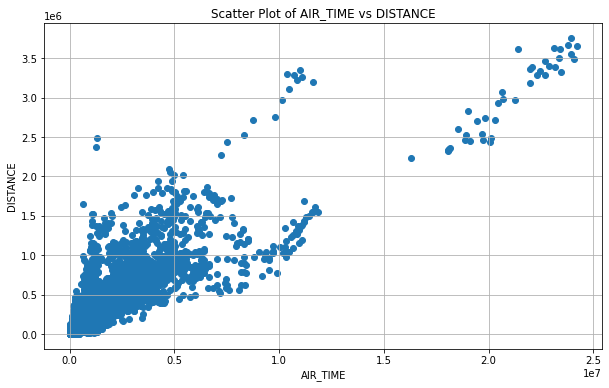

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(T_100_aggregated_df['AIR_TIME'], T_100_aggregated_df['DISTANCE'])
plt.title('Scatter Plot of AIR_TIME vs DISTANCE')
plt.xlabel('AIR_TIME')
plt.ylabel('DISTANCE')
plt.grid(True)
plt.show()

## Merging

In [59]:
merged_df = pd.merge(T_100_aggregated_df, P_52, how='inner', on=['AIRCRAFT_TYPE', 'AIRLINE_ID', 'YEAR', 'QUARTER'])
merged_df

,AIRLINE_ID,YEAR,QUARTER,AIRCRAFT_TYPE,Unnamed: 0,DEPARTURES_SCHEDULED,DISTANCE,AIR_TIME,FUEL_FLY_OPS,TOTAL_AIR_HOURS,AIR_FUELS_ISSUED
0,19393.0,2010,1,612,8.521539e+09,169182.0,2238680.0,16301315.0,510427.00,274.11,214903.94
1,19393.0,2010,1,616,4.109881e+09,11808.0,896105.0,1045077.0,35412.00,17.58,14909.26
2,19393.0,2010,1,619,7.353926e+09,87021.0,1699334.0,6837869.0,236090.00,114.87,99400.27
3,19393.0,2010,2,612,8.758756e+09,177435.0,2327213.0,18063032.0,578641.00,301.94,241463.97
4,19393.0,2010,2,616,3.662260e+09,13120.0,736734.0,1123572.0,39337.00,18.77,16415.25
...,...,...,...,...,...,...,...,...,...,...,...
4457,21236.0,2014,3,617,4.202075e+07,393.0,17604.0,28387.0,176.83,1.59,1171.27
4458,21634.0,2019,1,619,1.182996e+08,2370.0,4239.0,42173.0,2430.02,1.29,1159.21
4459,21634.0,2019,2,619,1.183226e+08,2401.0,4239.0,51930.0,2554.52,0.45,1176.71
4460,21634.0,2019,3,619,1.182735e+08,2332.0,4239.0,70225.0,2882.27,1.18,1243.94


## Visualizing

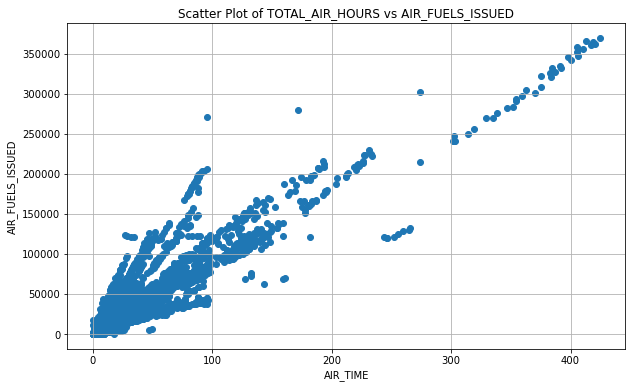

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['TOTAL_AIR_HOURS'], merged_df['AIR_FUELS_ISSUED'])
plt.title('Scatter Plot of TOTAL_AIR_HOURS vs AIR_FUELS_ISSUED')
plt.xlabel('AIR_TIME')
plt.ylabel('AIR_FUELS_ISSUED')
plt.grid(True)
plt.show()

In [61]:
merged_df_2 = merged_df[(0.3 <= (merged_df["AIR_FUELS_ISSUED"] / merged_df["DEPARTURES_SCHEDULED"])) & ((merged_df["AIR_FUELS_ISSUED"] / merged_df["DEPARTURES_SCHEDULED"]) <= 8)]
merged_df_deleted = merged_df.drop(merged_df_2.index)
merged_df_deleted.size / merged_df.size

0.2622142536978933

In [62]:
merged_df_deleted_percentage = merged_df_deleted["AIRCRAFT_TYPE"].value_counts() / merged_df["AIRCRAFT_TYPE"].value_counts()
merged_df_deleted_percentage
merged_df_deleted_percentage = merged_df_deleted_percentage.reset_index()
merged_df_deleted_percentage.columns = ['aircraft_type', 'percentage']
aircraft_type = [612, 614, 634, 698, 694, 622, 627, 637, 359]
merged_df_deleted_percentage_aircraft_type = merged_df_deleted_percentage[merged_df_deleted_percentage['aircraft_type'].isin(aircraft_type)]

merged_df_deleted_percentage_aircraft_type
#'612'='B737', '614'='B737', '634'='B737','698'='A319', '694'='A320', '622'='B757-200', '627'='B777','637'='B777', '359'='A350'

,aircraft_type,percentage
1,359,1.000000
10,612,0.004854
11,614,0.017094
15,622,0.097656
20,627,1.000000
24,634,0.012500
25,637,1.000000
44,694,0.019231
46,698,0.014599


In [63]:
model_map = {
    612: 'B737', 
    614: 'B737', 
    634: 'B737',
    698: 'A319', 
    694: 'A320', 
    622: 'B757-200', 
    627: 'B777',
    637: 'B777', 
    359: 'A350'
}

# Adding the 'model' column to the DataFrame
merged_df_deleted_percentage_aircraft_type['aircraft'] = merged_df_deleted_percentage_aircraft_type['aircraft_type'].map(model_map)
merged_df_deleted_percentage_aircraft_type

/var/folders/23/2tn_f63s7qndqcl49b91_md40000gn/T/ipykernel_13307/2139521012.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_deleted_percentage_aircraft_type['aircraft'] = merged_df_deleted_percentage_aircraft_type['aircraft_type'].map(model_map)


,aircraft_type,percentage,aircraft
1,359,1.000000,A350
10,612,0.004854,B737
11,614,0.017094,B737
15,622,0.097656,B757-200
20,627,1.000000,B777
24,634,0.012500,B737
25,637,1.000000,B777
44,694,0.019231,A320
46,698,0.014599,A319


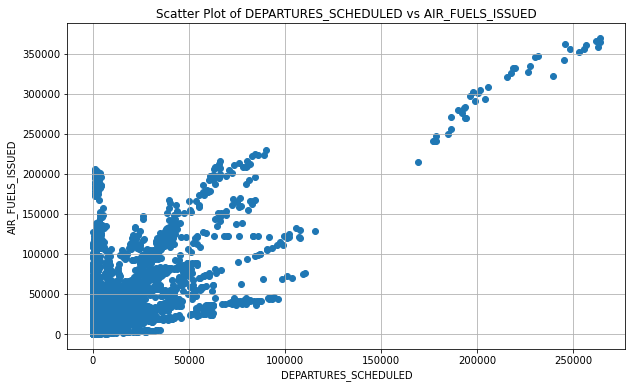

In [64]:

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['DEPARTURES_SCHEDULED'], merged_df['AIR_FUELS_ISSUED'])
plt.title('Scatter Plot of DEPARTURES_SCHEDULED vs AIR_FUELS_ISSUED')
plt.xlabel('DEPARTURES_SCHEDULED')
plt.ylabel('AIR_FUELS_ISSUED')
plt.grid(True)
plt.show()

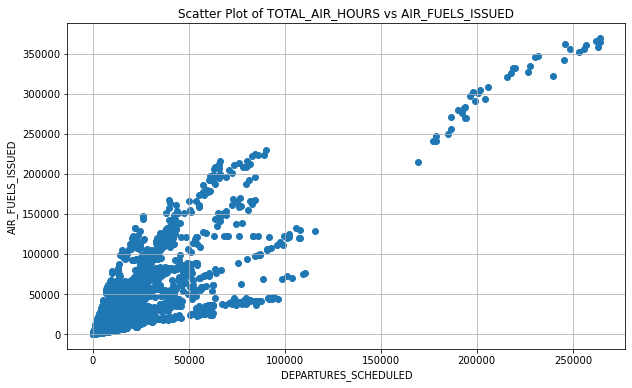

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df_2['DEPARTURES_SCHEDULED'], merged_df_2['AIR_FUELS_ISSUED'])
plt.title('Scatter Plot of TOTAL_AIR_HOURS vs AIR_FUELS_ISSUED')
plt.xlabel('DEPARTURES_SCHEDULED')
plt.ylabel('AIR_FUELS_ISSUED')
plt.grid(True)
plt.show()

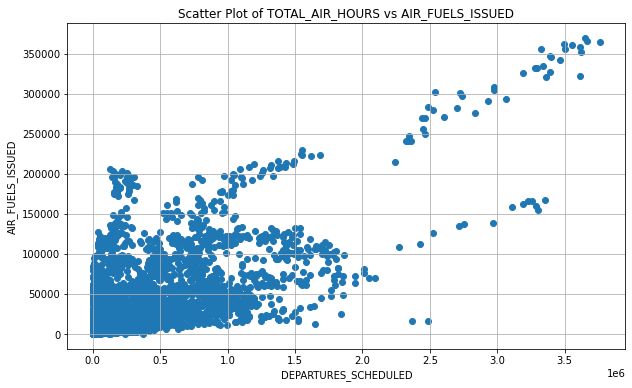

In [66]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['DISTANCE'], merged_df['AIR_FUELS_ISSUED'])
plt.title('Scatter Plot of TOTAL_AIR_HOURS vs AIR_FUELS_ISSUED')
plt.xlabel('DEPARTURES_SCHEDULED')
plt.ylabel('AIR_FUELS_ISSUED')
plt.grid(True)
plt.show()

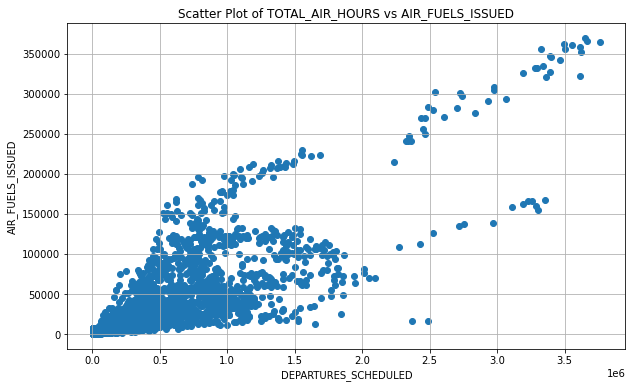

In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df_2['DISTANCE'], merged_df_2['AIR_FUELS_ISSUED'])
plt.title('Scatter Plot of TOTAL_AIR_HOURS vs AIR_FUELS_ISSUED')
plt.xlabel('DEPARTURES_SCHEDULED')
plt.ylabel('AIR_FUELS_ISSUED')
plt.grid(True)
plt.show()

In [68]:
622 in (merged_df_2["AIRCRAFT_TYPE"].unique())

True

In [69]:
# '622'='B757-200', '627'='B777','637'='B777','339'='A330', '343'='A330','824'='A330','359'='A350','836'='A350','882'='A380'
aircraft_type = [622, 627, 637, 339, 343, 824, 359, 836, 882]
merged_df_aircraft_type = merged_df[merged_df['AIRCRAFT_TYPE'].isin(aircraft_type)]

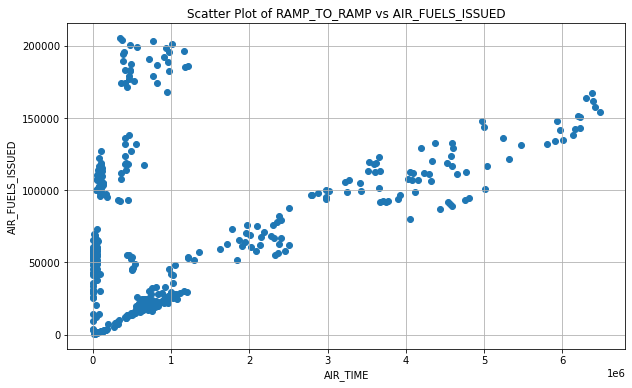

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df_aircraft_type['AIR_TIME'], merged_df_aircraft_type['AIR_FUELS_ISSUED'])
plt.title('Scatter Plot of RAMP_TO_RAMP vs AIR_FUELS_ISSUED')
plt.xlabel('AIR_TIME')
plt.ylabel('AIR_FUELS_ISSUED')
plt.grid(True)
plt.show()

In [71]:
merged_df_2.head()

,AIRLINE_ID,YEAR,QUARTER,AIRCRAFT_TYPE,Unnamed: 0,DEPARTURES_SCHEDULED,DISTANCE,AIR_TIME,FUEL_FLY_OPS,TOTAL_AIR_HOURS,AIR_FUELS_ISSUED
0,19393.0,2010,1,612,8.521539e+09,169182.0,2238680.0,16301315.0,510427.0,274.11,214903.94
1,19393.0,2010,1,616,4.109881e+09,11808.0,896105.0,1045077.0,35412.0,17.58,14909.26
2,19393.0,2010,1,619,7.353926e+09,87021.0,1699334.0,6837869.0,236090.0,114.87,99400.27
3,19393.0,2010,2,612,8.758756e+09,177435.0,2327213.0,18063032.0,578641.0,301.94,241463.97
4,19393.0,2010,2,616,3.662260e+09,13120.0,736734.0,1123572.0,39337.0,18.77,16415.25


In [72]:
merged_df["ln_AIR_FUELS_ISSUED"] = np.log(merged_df["AIR_FUELS_ISSUED"])
merged_df["ln_DEPARTURES_SCHEDULED"] = np.log(merged_df["DEPARTURES_SCHEDULED"])
merged_df["ln_AIR_TIME"] = np.log(merged_df["TOTAL_AIR_HOURS"])
merged_df["ln_DISTANCE"] = np.log(merged_df["DISTANCE"])
merged_df["time"] = (merged_df["YEAR"]-2010)*4 + merged_df["QUARTER"]

/Users/yhtang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/yhtang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [73]:
merged_df_2["ln_AIR_FUELS_ISSUED"] = np.log(merged_df_2["AIR_FUELS_ISSUED"])
merged_df_2["ln_DEPARTURES_SCHEDULED"] = np.log(merged_df_2["DEPARTURES_SCHEDULED"])
merged_df_2["ln_AIR_TIME"] = np.log(merged_df_2["TOTAL_AIR_HOURS"])
merged_df_2["ln_DISTANCE"] = np.log(merged_df_2["DISTANCE"])
merged_df_2["time"] = (merged_df_2["YEAR"]-2010)*4 + merged_df_2["QUARTER"]

/var/folders/23/2tn_f63s7qndqcl49b91_md40000gn/T/ipykernel_13307/2083154446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_2["ln_AIR_FUELS_ISSUED"] = np.log(merged_df_2["AIR_FUELS_ISSUED"])
/var/folders/23/2tn_f63s7qndqcl49b91_md40000gn/T/ipykernel_13307/2083154446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df_2["ln_DEPARTURES_SCHEDULED"] = np.log(merged_df_2["DEPARTURES_SCHEDULED"])
/var/folders/23/2tn_f63s7qndqcl49b91_md40000gn/T/ipykernel_13307/2083154446.py:3: SettingWithC

In [74]:
merged_df_2

,AIRLINE_ID,YEAR,QUARTER,AIRCRAFT_TYPE,Unnamed: 0,DEPARTURES_SCHEDULED,DISTANCE,AIR_TIME,FUEL_FLY_OPS,TOTAL_AIR_HOURS,AIR_FUELS_ISSUED,ln_AIR_FUELS_ISSUED,ln_DEPARTURES_SCHEDULED,ln_AIR_TIME,ln_DISTANCE,time
0,19393.0,2010,1,612,8.521539e+09,169182.0,2238680.0,16301315.0,510427.00,274.11,214903.94,12.277946,12.038730,5.613529,14.621397,1
1,19393.0,2010,1,616,4.109881e+09,11808.0,896105.0,1045077.0,35412.00,17.58,14909.26,9.609738,9.376533,2.866762,13.705813,1
2,19393.0,2010,1,619,7.353926e+09,87021.0,1699334.0,6837869.0,236090.00,114.87,99400.27,11.506910,11.373905,4.743801,14.345747,1
3,19393.0,2010,2,612,8.758756e+09,177435.0,2327213.0,18063032.0,578641.00,301.94,241463.97,12.394476,12.086360,5.710228,14.660182,2
4,19393.0,2010,2,616,3.662260e+09,13120.0,736734.0,1123572.0,39337.00,18.77,16415.25,9.705966,9.481893,2.932260,13.509982,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4457,21236.0,2014,3,617,4.202075e+07,393.0,17604.0,28387.0,176.83,1.59,1171.27,7.065844,5.973810,0.463734,9.775881,19
4458,21634.0,2019,1,619,1.182996e+08,2370.0,4239.0,42173.0,2430.02,1.29,1159.21,7.055494,7.770645,0.254642,8.352083,37
4459,21634.0,2019,2,619,1.183226e+08,2401.0,4239.0,51930.0,2554.52,0.45,1176.71,7.070478,7.783641,-0.798508,8.352083,38
4460,21634.0,2019,3,619,1.182735e+08,2332.0,4239.0,70225.0,2882.27,1.18,1243.94,7.126039,7.754482,0.165514,8.352083,39


In [75]:
aircraft_id_map = pd.read_csv("L_AIRCRAFT_TYPE.csv")

In [76]:
merged_df = pd.merge(merged_df, aircraft_id_map, left_on='AIRCRAFT_TYPE', right_on='Code', how='left')

In [77]:
merged_df_grouped = merged_df.groupby('AIRCRAFT_TYPE')['DEPARTURES_SCHEDULED'].sum().reset_index()
merged_df_grouped_sorted = merged_df_grouped.sort_values(by='DEPARTURES_SCHEDULED', ascending=False)
merged_df_grouped_sorted = pd.merge(merged_df_grouped_sorted, aircraft_id_map, left_on='AIRCRAFT_TYPE', right_on='Code', how='left')
merged_df_grouped_sorted.head(30)

,AIRCRAFT_TYPE,DEPARTURES_SCHEDULED,Code,Description
0,612,9413495.0,612,Boeing 737-700/700LR/Max 7
1,614,6371041.0,614,Boeing 737-800
2,629,6341632.0,629,Canadair RJ-200ER /RJ-440
3,694,5591212.0,694,Airbus Industrie A320-100/200
4,675,4164871.0,675,Embraer-145
5,698,4017277.0,698,Airbus Industrie A319
6,655,3881608.0,655,McDonnell Douglas DC9 Super 80/MD81/82/83/88
7,631,3411662.0,631,Canadair RJ-700
8,622,3186682.0,622,Boeing 757-200
9,673,3160889.0,673,Embraer ERJ-175


In [78]:
# merged_df_departure = merged_df.
merged_df_avaibility = merged_df.value_counts('AIRCRAFT_TYPE')
merged_df_avaibility = merged_df_avaibility.to_frame(name = "Number").reset_index()
merged_df_avaibility = pd.merge(merged_df_avaibility, aircraft_id_map, left_on='AIRCRAFT_TYPE', right_on='Code', how='left')
merged_df_avaibility.head(30)

,AIRCRAFT_TYPE,Number,Code,Description
0,694,312,694,Airbus Industrie A320-100/200
1,698,274,698,Airbus Industrie A319
2,626,258,626,Boeing 767-300/300ER
3,622,256,622,Boeing 757-200
4,614,234,614,Boeing 737-800
5,612,206,612,Boeing 737-700/700LR/Max 7
6,631,178,631,Canadair RJ-700
7,699,142,699,Airbus Industrie A321/Lr
8,673,139,673,Embraer ERJ-175
9,638,138,638,Canadair CRJ 900


In [79]:
aircraft_id_map = pd.read_csv("L_AIRCRAFT_TYPE.csv")
aircraft_id_map.head()

,Code,Description
0,7,Aero Commander 200
1,8,Aero Macchi AL-60
2,9,Aeronca 7-AC
3,10,Beech Bonanza 35A/C/D/E/G/H/J/K/S/V/ 36A
4,20,Bellanca CH-300


In [80]:
merged_df.head().T

,0,1,2,3,4
AIRLINE_ID,19393.0,19393.0,19393.0,19393.0,19393.0
YEAR,2010,2010,2010,2010,2010
QUARTER,1,1,1,2,2
AIRCRAFT_TYPE,612,616,619,612,616
Unnamed: 0,8521538666.0,4109880846.0,7353926000.0,8758756242.0,3662259620.0
DEPARTURES_SCHEDULED,169182.0,11808.0,87021.0,177435.0,13120.0
DISTANCE,2238680.0,896105.0,1699334.0,2327213.0,736734.0
AIR_TIME,16301315.0,1045077.0,6837869.0,18063032.0,1123572.0
FUEL_FLY_OPS,510427.0,35412.0,236090.0,578641.0,39337.0
TOTAL_AIR_HOURS,274.11,17.58,114.87,301.94,18.77


In [81]:
merged_df_2.to_excel('database2010_2019_Febcorrect.xlsx')

In [86]:
merged_df.to_excel('database2010_2019_Febcorrect3.xlsx')

In [87]:
# load the data
merged_df = pd.read_excel('database2010_2019_Febcorrect3.xlsx')

# check if there's duplicate rows

merged_df[['AIRLINE_ID', 'YEAR', 'QUARTER', 'AIRCRAFT_TYPE']].drop_duplicates()

,AIRLINE_ID,YEAR,QUARTER,AIRCRAFT_TYPE
0,19393,2010,1,612
1,19393,2010,1,616
2,19393,2010,1,619
3,19393,2010,2,612
4,19393,2010,2,616
...,...,...,...,...
4457,21236,2014,3,617
4458,21634,2019,1,619
4459,21634,2019,2,619
4460,21634,2019,3,619


In [88]:
merged_df.shape

(4462, 20)